In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/pd_speech_features.csv", header=1)
df.head()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
df.shape

(756, 755)

In [ ]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [ ]:
df = df.drop(columns=["id"])
df.shape


(756, 754)

In [ ]:
df.isnull().sum()

,0
gender,0
PPE,0
DFA,0
RPDE,0
numPulses,0
...,...
tqwt_kurtosisValue_dec_33,0
tqwt_kurtosisValue_dec_34,0
tqwt_kurtosisValue_dec_35,0
tqwt_kurtosisValue_dec_36,0


In [ ]:
X = df.drop(columns=["class"])
y = df["class"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (756, 753)
y shape: (756,)


In [ ]:
y.value_counts()


,count
class,
1,564
0,192


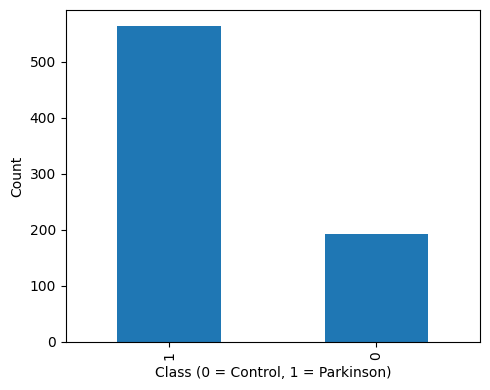

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
y.value_counts().plot(kind="bar")

plt.xlabel("Class (0 = Control, 1 = Parkinson)")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig("class_distribution.png", dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


X_train: (604, 753)
X_test : (152, 753)


In [ ]:
X.dtypes.value_counts()


,count
float64,749
int64,4


In [ ]:
df.duplicated().sum()


np.int64(1)

In [ ]:
print("Train class ratio:\n", y_train.value_counts(normalize=True))
print("\nTest class ratio:\n", y_test.value_counts(normalize=True))


Train class ratio:
 class
1    0.746689
0    0.253311
Name: proportion, dtype: float64

Test class ratio:
 class
1    0.743421
0    0.256579
Name: proportion, dtype: float64


In [ ]:
df = df.drop_duplicates()
X = df.drop(columns=["class"])
y = df["class"]

print(df.shape)
print(y.value_counts())


(755, 754)
class
1    563
0    192
Name: count, dtype: int64


Baseline Logistic Regression Results
Accuracy : 0.8477
Precision: 0.8814
Recall   : 0.9204
F1-score : 0.9004


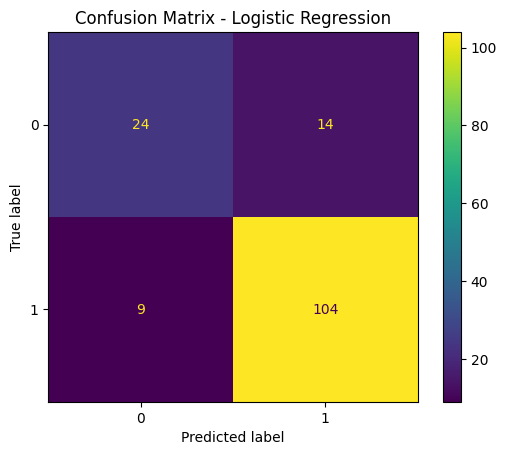

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# X ve y'yi tekrar tanımlayalım (temiz df üzerinden)
X = df.drop(columns=["class"])
y = df["class"]

# Train / Test split (aynı oran, aynı stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Baseline pipeline
baseline_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=3000))
])

# Modeli eğit
baseline_model.fit(X_train, y_train)

# Tahmin
y_pred = baseline_model.predict(X_test)

# Metrikler
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Baseline Logistic Regression Results")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

import matplotlib.pyplot as plt
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("confusion_matrix_lr.png", dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
from sklearn.svm import SVC

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf"))
])

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Results")
print(f"Accuracy : {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_svm):.4f}")


SVM Results
Accuracy : 0.8411
Precision: 0.8346
Recall   : 0.9823
F1-score : 0.9024


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results")
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_rf):.4f}")


Random Forest Results
Accuracy : 0.8543
Precision: 0.8583
Recall   : 0.9646
F1-score : 0.9083


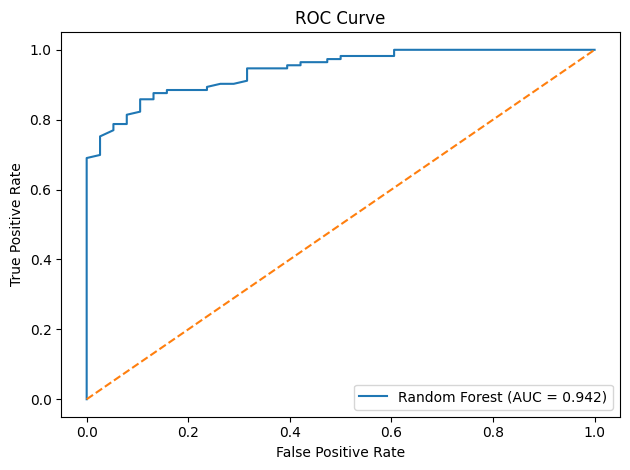

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest için olasılık skorları
y_scores = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("roc_rf.png", dpi=300, bbox_inches="tight")
plt.show()





In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Results")
print(f"Accuracy : {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_knn):.4f}")


KNN Results
Accuracy : 0.8344
Precision: 0.8385
Recall   : 0.9646
F1-score : 0.8971


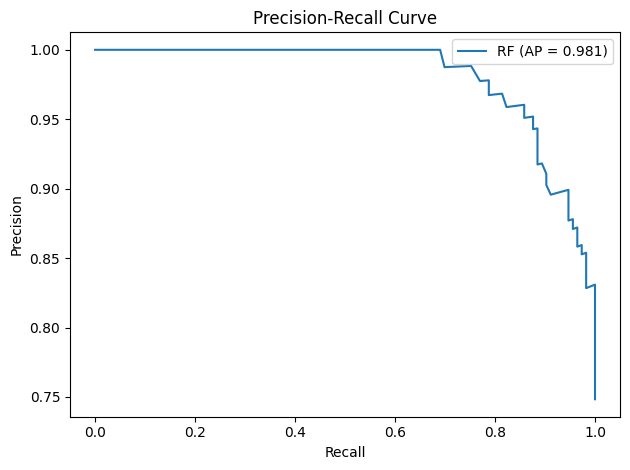

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)

plt.figure()
plt.plot(recall, precision, label=f"RF (AP = {ap_score:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("pr_curve_rf.png", dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "SVM",
        "Random Forest",
        "KNN"
    ],
    "Accuracy": [
        0.8477,
        0.8411,
        0.8543,
        0.8344
    ],
    "Precision": [
        0.8814,
        0.8346,
        0.8583,
        0.8385
    ],
    "Recall": [
        0.9204,
        0.9823,
        0.9646,
        0.9646
    ],
    "F1-score": [
        0.9004,
        0.9024,
        0.9083,
        0.8971
    ]
})

results


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.8477,0.8814,0.9204,0.9004
1,SVM,0.8411,0.8346,0.9823,0.9024
2,Random Forest,0.8543,0.8583,0.9646,0.9083
3,KNN,0.8344,0.8385,0.9646,0.8971


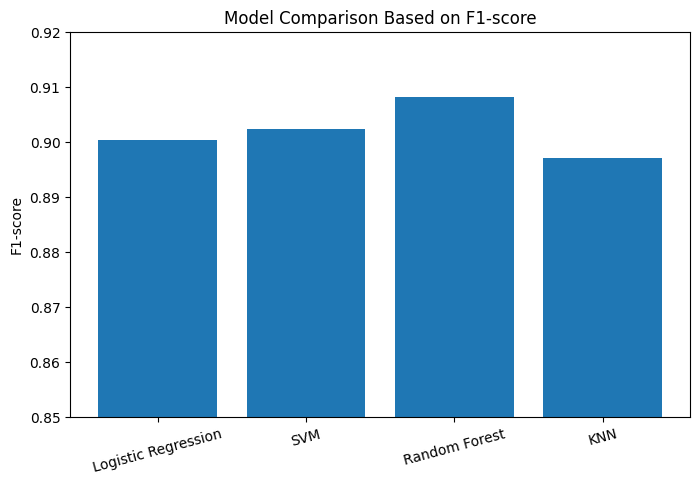

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["F1-score"])
plt.ylabel("F1-score")
plt.title("Model Comparison Based on F1-score")
plt.ylim(0.85, 0.92)
plt.xticks(rotation=15)
plt.show()
plt.savefig("f1_comparison.png", dpi=300, bbox_inches="tight")
plt.show()



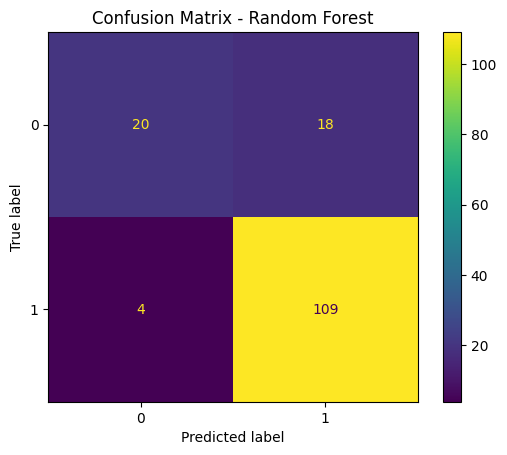

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Confusion Matrix - Random Forest")
plt.show()
plt.savefig("cm_rf.png", dpi=300, bbox_inches="tight")
plt.show()



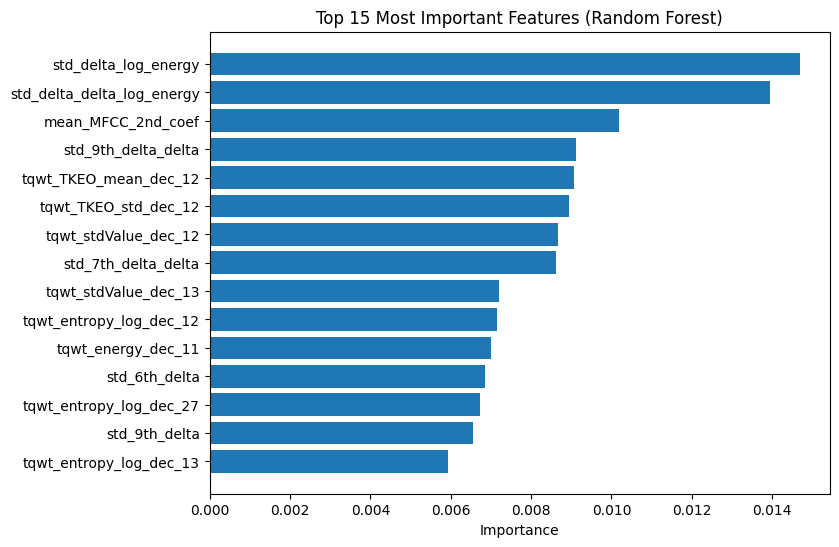

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]  # en önemli 15 feature

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 15 Most Important Features (Random Forest)")
plt.xlabel("Importance")
plt.show()
plt.savefig("feature_importance_rf.png", dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}


In [ ]:
rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300, 500]},
             scoring='f1', verbose=2)

In [ ]:
print("Best parameters found:")
print(grid_search.best_params_)

print("\nBest cross-validation F1-score:")
print(grid_search.best_score_)


Best parameters found:
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Best cross-validation F1-score:
0.9147469857730384


In [ ]:
best_rf = grid_search.best_estimator_

y_pred_tuned = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Tuned Random Forest Results")
print(f"Accuracy : {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_tuned):.4f}")


Tuned Random Forest Results
Accuracy : 0.8543
Precision: 0.8473
Recall   : 0.9823
F1-score : 0.9098


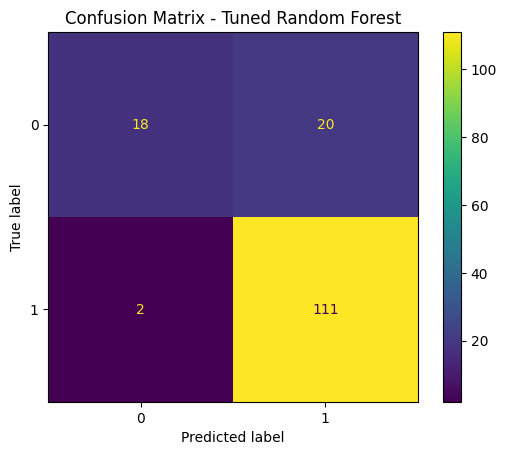

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuned)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()
plt.savefig("cm_tuned_rf.png", dpi=300, bbox_inches="tight")
plt.show()

